<a href="https://colab.research.google.com/github/MCygert/handball_classifier/blob/main/handball_video_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project made for classifing actions in handball


## Loading data

In [ ]:
!ls

drive  sample_data


In [ ]:
directory_to_data = "drive/MyDrive/handball"
!ls drive/MyDrive/handball

passes	saves  shots


## 1. We need to split data 80/20 into folders


In [ ]:
import os
import shutil

# Create folders for test and train data
os.mkdir('test')
os.mkdir('train')

# Creating subfolders per class in both folders
directories = []
for dirname, dirpath, filename in os.walk(directory_to_data):
  directories.append(dirpath)
directories = directories[0]

for directory in directories:
  os.mkdir(f'test/{directory}')
  os.mkdir(f'train/{directory}')

In [ ]:
files = []
sorted_by_classes = {}
for dirname, dirpath, filename in os.walk(directory_to_data):
  files.append(filename)
files = files[1:]
# Create dictionary which has{class: list_of_videos}
for i, dictionary in enumerate(directories):
  sorted_by_classes[dictionary] = files[i]  


In [ ]:
import random
def split_data(data):
  '''
  Returning 2 lists which are splitted in 10/90 manner 
  '''
  train_data = data.copy()
  test_data = []
  for i in range(round(len(data) / 10)):
    test_data.append(train_data.pop(random.randrange(len(train_data))))
  return train_data, test_data

In [ ]:
train_data, test_data = split_data(sorted_by_classes['saves'])

# Check if it's splitting correctly
len(train_data), len(test_data), len(sorted_by_classes['saves'])

(49, 5, 54)

In [ ]:
# Create splitted data
train_elements = {}
test_elements = {}
for key in sorted_by_classes.items():
  class_of_video = key[0]
  train, test = split_data(key[1])
  train_elements[class_of_video] = train
  test_elements[class_of_video] = test
test_elements['saves'], test_elements['passes'], test_elements['shots']

(['save35.mp4', 'save11.mp4', 'save10.mp4', 'save6.mp4', 'save44.mp4'],
 ['pass86.mp4',
  'pass70.mp4',
  'pass339.mp4',
  'pass216.mp4',
  'pass183.mp4',
  'pass177.mp4',
  'pass29.mp4',
  'pass49.mp4',
  'pass148.mp4',
  'pass46.mp4',
  'pass237.mp4',
  '134.mp4',
  'pass142.mp4',
  'pass144.mp4',
  'pass288.mp4',
  'pass206.mp4',
  'pass118.mp4',
  'pass89.mp4',
  'pass8.mp4',
  'pass332.mp4',
  'pass114.mp4',
  'pass44.mp4',
  'pass143.mp4',
  'pass121.mp4',
  'pass222.mp4',
  '343.mp4',
  'pass120.mp4',
  'pass80.mp4',
  'pass140.mp4',
  'pass232.mp4',
  'pass318.mp4',
  'pass308.mp4',
  'pass302.mp4',
  'pass301.mp4',
  'pass185.mp4'],
 ['shto146.mp4',
  'shot143.mp4',
  'shot114.mp4',
  'shot135.mp4',
  'shot61.mp4',
  'shot22.mp4',
  'shot40.mp4',
  'shot49.mp4',
  'shot125.mp4',
  'shot138.mp4',
  'shot145.mp4',
  'shot50.mp4',
  'shot74.mp4',
  'shot129.mp4',
  'shot68.mp4'])

In [ ]:
def move_files_to_correct_directories(data_dictionary, type_of_data):
  for key in data_dictionary.items():
    for file_name in key[1]:
      shutil.copy(directory_to_data + '/' + key[0] + '/' + file_name, type_of_data + '/' + key[0] + '/' + file_name)

In [ ]:
# Moving files into correct folders
move_files_to_correct_directories(train_elements, 'train')
move_files_to_correct_directories(test_elements, 'test')

## 2. Extract jpegs of videos
Later I can extract frames and save them as jpegs from video and move them to folder. After that get features with CNN it could save a lot of time while processing the data. Because it will go straight to RNN layers 


## 3. Create csv 
Which will have  **label,path** structure per train and test directory


In [ ]:
test_files = {}
for dirname, dirpath, filename in os.walk("test"):
  print(dirname)
  test_files[dirname] = filename
test_files.pop('test')
for key in test_files:
  print(key)
  test_files[key.split('/')[1]] = test_files.pop(key)

print(test_files.keys()) 

test
test/saves
test/passes
test/shots
test/saves
test/passes
dict_keys(['test/shots', 'saves', 'passes'])


In [ ]:
def get_files_path(path):
  list_of_paths = []
  for root, dirs, files in os.walk(path):
    for filename in files:
      list_of_paths.append(root + '/' + filename)
  return list_of_paths

In [ ]:
# Trying to create correct label
import pandas as pd
def create_data_frame(path):
  path_shots = path + 'shots'
  map_for_paths = {'shots': get_files_path(path_shots),
                 'saves': get_files_path(path + 'saves'),
                 'passes': get_files_path(path + 'passes')}
  list_of_tuples_for_data_frame = []
  shots = map_for_paths['shots']
  saves = map_for_paths['saves']
  passes = map_for_paths['passes']
  for path in shots:
    list_of_tuples_for_data_frame.append(('shots', path))
  for path in saves:
    list_of_tuples_for_data_frame.append(('saves', path))
  for path in passes:
    list_of_tuples_for_data_frame.append(('passes', path))
  return pd.DataFrame(list_of_tuples_for_data_frame, columns=['Tag', 'Path'])  


In [ ]:
train_df = create_data_frame('train/')
test_df = create_data_frame('test/')

train_df.head()

,Tag,Path
0,shots,train/shots/shot95.mp4
1,shots,train/shots/shot62.mp4
2,shots,train/shots/shot6.mp4
3,shots,train/shots/shot120.mp4
4,shots,train/shots/shot56.mp4


## Minor EDA

In [ ]:
train_df.shape, test_df.shape

((500, 2), (55, 2))

In [ ]:
train_df['Tag'].value_counts()

passes    315
shots     136
saves      49
Name: Tag, dtype: int64

In [ ]:
train_df['Tag'].value_counts(normalize=True)

passes    0.630
shots     0.272
saves     0.098
Name: Tag, dtype: float64

In [ ]:
test_df['Tag'].value_counts()

passes    35
shots     15
saves      5
Name: Tag, dtype: int64

In [ ]:
test_df['Tag'].value_counts(normalize=True)

passes    0.636364
shots     0.272727
saves     0.090909
Name: Tag, dtype: float64

### Simple plots for better visualization
To be added later

## Pre loading frames from videos

In [ ]:
import cv2
import numpy as np
IMG_SIZE = 224
def crop_center_square(frame):
  y, x = frame.shape[0:2]
  min_dim = min(y, x)
  start_x = (x // 2) - (min_dim // 2)
  start_y = (y // 2) - (min_dim // 2)
  return frame[start_y : start_y + min_dim, start_x : start_x + min_dim]

def load_video(path, max_frames=0, resize=(IMG_SIZE, IMG_SIZE)):
  cap = cv2.VideoCapture(path)
  frames = []
  try:
    while True:
      ret, frame = cap.read()
      if not ret:
        break
      frame = crop_center_square(frame)
      frame = cv2.resize(frame, resize)
      frame = frame[:, :, [2,1,0]]
      frames.append(frame)

      if len(frames) == max_frames:
        break
  finally:
    cap.release()
  return np.array(frames)

# Create models for training

##1. Create data loader

##2. Create feature extractor with pre-trained model

In [ ]:
from tensorflow.keras import layers
from tensorflow import keras
import tensorflow as tf

feature_extractor = tf.keras.applications.InceptionV3(
    include_top = False,
    weights = 'imagenet',
    input_shape = (IMG_SIZE,IMG_SIZE,3),
    pooling = 'avg'
)
preprocess_input = keras.applications.inception_v3.preprocess_input

inputs = keras.Input((IMG_SIZE, IMG_SIZE, 3))
preprocessed = preprocess_input(inputs)

outputs = feature_extractor(preprocessed)
feature_extractor_model = keras.Model(inputs, outputs, 'feature_extractor')




87924736/87910968 [==============================] - 1s 0us/step


In [ ]:
numpy_video = load_video('train/passes/pass105.mp4', max_frames=15)
feature_extractor.apply(np.expand_dims(numpy_video[4], axis=0))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  


<tf.Tensor: shape=(1, 2048), dtype=float32, numpy=
array([[0.90981483, 0.03502941, 1.3373344 , ..., 0.        , 0.        ,
        0.00425651]], dtype=float32)>

In [ ]:
label_processor = keras.layers.StringLookup(
    num_oov_indices=0, vocabulary=np.unique(train_df["Tag"])
)
label_processor.get_vocabulary()

['passes', 'saves', 'shots']

In [ ]:
%timeit
SEQ_NUMBER = 20
def prepare_all_videos(df):
  num_samples = len(df)
  video_paths = df['Path'].values.tolist()
  labels = df['Tag'].values
  labels = label_processor(labels[..., None]).numpy()


  frame_masks = np.zeros(shape=(num_samples, SEQ_NUMBER), dtype='bool')
  frame_features = np.zeros(
      shape=(num_samples, SEQ_NUMBER, 2048),
      dtype='float32'
  )
  for idx, path in enumerate(video_paths):
   frames = load_video(path)
   frames = frames[None, ...]

   temp_frame_mask = np.zeros(shape=(1, SEQ_NUMBER,), dtype='bool')
   temp_frame_features = np.zeros(
      shape=(1, 20, 2048),
     dtype='float32'
  )

   for i, batch in enumerate(frames):
     video_length = batch.shape[0]
     length = min(SEQ_NUMBER, video_length)
     for j in range(length):
        temp_frame_features[i, j, :] = feature_extractor.predict(
                     batch[None, j, :]
                  )
     temp_frame_mask[i, :length] = 1
   frame_features[idx,] = temp_frame_features.squeeze()
   frame_masks[idx,] = temp_frame_mask.squeeze()
  return (frame_features, frame_masks), labels

In [ ]:
train_data, train_labels = prepare_all_videos(train_df)
test_data, test_labels = prepare_all_videos(test_df)

In [ ]:
len(test_data)

2

In [ ]:
class_vocab = label_processor.get_vocabulary()
frame_features_input = keras.Input((SEQ_NUMBER, 2048))
mask_input = keras.Input((SEQ_NUMBER,), dtype="bool")

x = keras.layers.GRU(16, return_sequences=True)(
        frame_features_input, mask=mask_input
  )
x = keras.layers.GRU(8)(x)
x = keras.layers.Dropout(0.4)(x)
x = keras.layers.Dense(8, activation="relu")(x)
output = keras.layers.Dense(len(class_vocab), activation="softmax")(x)
rnn_model = keras.Model([frame_features_input, mask_input], output)

rnn_model.compile(
    loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"]
)

In [ ]:
rnn_model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 20, 2048)]   0           []                               
                                                                                                  
 input_12 (InputLayer)          [(None, 20)]         0           []                               
                                                                                                  
 gru_6 (GRU)                    (None, 20, 16)       99168       ['input_11[0][0]',               
                                                                  'input_12[0][0]']               
                                                                                                  
 gru_7 (GRU)                    (None, 8)            624         ['gru_6[0][0]']            

In [ ]:
filepath = 'rnn_model/classifier'
checkpoint = keras.callbacks.ModelCheckpoint(
    filepath, save_weights_only=True, save_best_only=True, verbose=1
)

history_1 = rnn_model.fit(
    [train_data[0], train_data[1]],
    train_labels,
    validation_split=0.3,
    epochs=10,
    callbacks=[checkpoint],

)

Epoch 1/10
10/11 [==========================>...] - ETA: 0s - loss: 1.0604 - accuracy: 0.3875
Epoch 00001: val_loss improved from inf to 0.88994, saving model to rnn_model/classifier
11/11 [==============================] - 13s 370ms/step - loss: 1.0551 - accuracy: 0.3971 - val_loss: 0.8899 - val_accuracy: 0.8133
Epoch 2/10
10/11 [==========================>...] - ETA: 0s - loss: 1.0195 - accuracy: 0.4281
Epoch 00002: val_loss improved from 0.88994 to 0.88609, saving model to rnn_model/classifier
11/11 [==============================] - 0s 45ms/step - loss: 1.0183 - accuracy: 0.4229 - val_loss: 0.8861 - val_accuracy: 1.0000
Epoch 3/10
 9/11 [=======================>......] - ETA: 0s - loss: 1.0080 - accuracy: 0.4306
Epoch 00003: val_loss improved from 0.88609 to 0.85935, saving model to rnn_model/classifier
11/11 [==============================] - 0s 44ms/step - loss: 1.0109 - accuracy: 0.4457 - val_loss: 0.8594 - val_accuracy: 1.0000
Epoch 4/10
 9/11 [=======================>......] -

In [ ]:
_, accuracy = rnn_model.evaluate([test_data[0], test_data[1]], test_labels)
print(f"Test accuracy: {round(accuracy * 100, 2)}%")

2/2 [==============================] - 0s 14ms/step - loss: 0.9227 - accuracy: 0.6364
Test accuracy: 63.64%


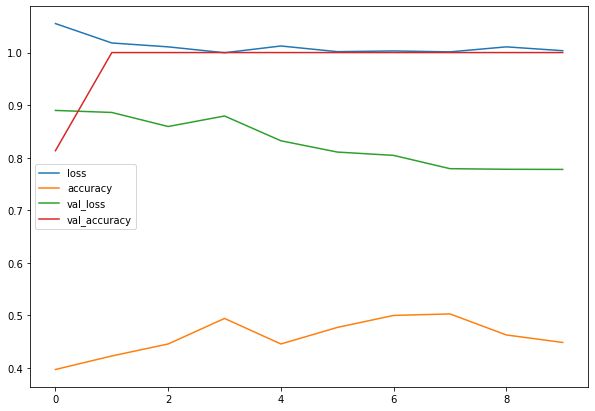

In [ ]:
pd.DataFrame(history_1.history).plot(figsize=(10,7))

##3. Validate on video and show results.